In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file - explanations for each sentence being constitutive (attribution scores for that scenario)
df_c = pd.read_csv('explanation_analysis_data/results_with_classifications_0.csv')
# Load the CSV file - explanations for each sentence being regulatory (attribution scores for that scenario)
df_r = pd.read_csv('explanation_analysis_data/results_with_classifications_1.csv')

# Filter for true negatives / true 
df_c = df_c[df_c['model'] == df_c['ground_truth']]
df_r = df_r[df_r['model'] == df_r['ground_truth']]

In [17]:
# Calculate the length of each sentence
df_c['sentence_length'] = df_c['sentence'].apply(len)
df_r['sentence_length'] = df_r['sentence'].apply(len)

# Calculate the relative start index (position) of each word
df_c['relative_position'] = df_c['start_index'] / df_c['sentence_length']
df_r['relative_position'] = df_r['start_index'] / df_r['sentence_length']

In [18]:
# Calculate mean attribution scores and mean position / location of word in sentence
grouped_df_c = df_c.groupby(['word']).agg({
    'attribution': 'mean', 'relative_position': 'mean'
}).reset_index()

top_words_c = grouped_df_c.sort_values(by='attribution', ascending=False).head(200)  # Adjust N as needed
top_words_c_lbls = grouped_df_c.sort_values(by='attribution', ascending=False).head(30)  # Adjust N as needed
filtered_df_c = grouped_df_c[grouped_df_c['word'].isin(top_words_c['word'])]

grouped_df_r = df_r.groupby(['word']).agg({
    'attribution': 'mean', 'relative_position': 'mean'
}).reset_index()

top_words_r = grouped_df_r.sort_values(by='attribution', ascending=False).head(200)  # Adjust N as needed
top_words_r_lbls = grouped_df_r.sort_values(by='attribution', ascending=False).head(30)  # Adjust N as needed
filtered_df_r = grouped_df_r[grouped_df_r['word'].isin(top_words_r['word'])]

Text(0, 0.5, 'Mean word attribution score')

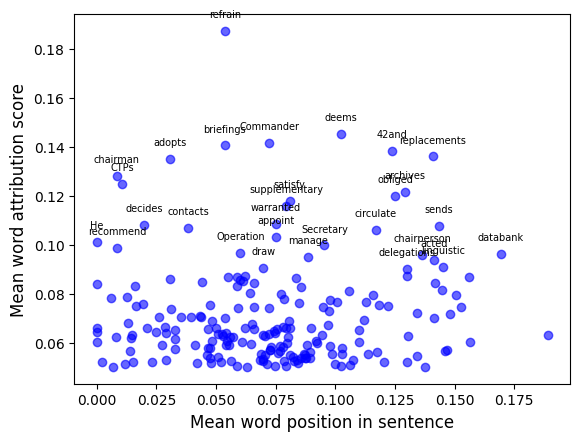

In [22]:
# Plot results: SCATTER - regulatory
plt.scatter(filtered_df_r['relative_position'], filtered_df_r['attribution'], color='blue', alpha=0.6)

# Label each point with the corresponding word
for i in range(len(filtered_df_r)):
    word = filtered_df_r['word'].iloc[i]
    if word in top_words_r_lbls['word'].tolist():
        plt.annotate(filtered_df_r['word'].iloc[i], 
                     (filtered_df_r['relative_position'].iloc[i], filtered_df_r['attribution'].iloc[i]),
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center', fontsize=7, color='black')

plt.xlabel('Mean word position in sentence', fontsize=12)
plt.ylabel('Mean word attribution score', fontsize=12)

Text(0, 0.5, 'Mean word attribution score')

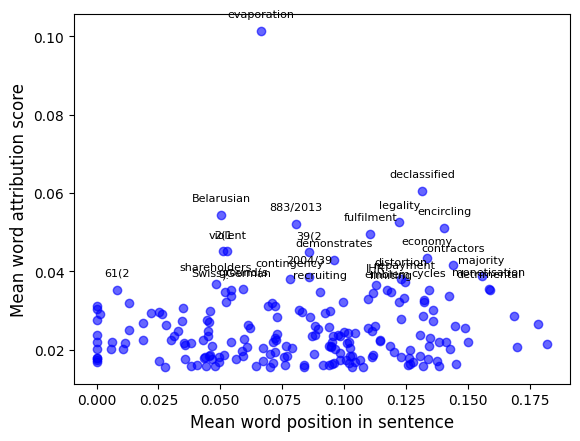

In [23]:
# Plot results: SCATTER - constitutive
plt.scatter(filtered_df_c['relative_position'], filtered_df_c['attribution'], color='blue', alpha=0.6)

# Label each point with the corresponding word
for i in range(len(filtered_df_c)):
    word = filtered_df_c['word'].iloc[i]
    if word in top_words_c_lbls['word'].tolist():
        plt.annotate(filtered_df_c['word'].iloc[i], 
                     (filtered_df_c['relative_position'].iloc[i], filtered_df_c['attribution'].iloc[i]),
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center', fontsize=8, color='black')

plt.xlabel('Mean word position in sentence', fontsize=12)
plt.ylabel('Mean word attribution score', fontsize=12)
# plt.title('Non-regulatory: words with top 200 highest mean attribution scores', fontsize=14)